## Word Cloud from a Pandas DataFrame

A word cloud is a data visualization technique that shows the most used words in large font and the least used words in small font. It helps to get an idea about the text data, especially when working on natural language processing or business insights. This notebook shows how to visualize a word cloud from a pandas DataFrame in Python.

The idea of this project is to visualize the most common additional product names that people tend to buy together with the main product. The main sales product in our dataset is a Bike and related products are Clothing and Accessories.

This approach can be used to evaluate the basis insights for marketing strategies and compaigns.

Now let’s see how to visualize a word cloud from a dataset. For this task, I will first import all the necessary Python libraries and a dataset with `sales` and `products` information.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image;
from wordcloud import WordCloud, STOPWORDS

## Assume we have datasets with sales and products

In [16]:
products = pd.read_csv('products.csv', index_col=0)
sales = pd.read_csv('sales.csv', index_col=0)

sales.head()

,OrderDate,OrderNumber,OrderLineItem,ProductSold,SoldTo,SoldIn,OrderQuantity,SoldBy,Shipping_Type,Order_Status
0,4/5/2017,SO67694,1,605,12754,7,1,284,Self Pickup,ok
1,4/5/2017,SO67666,1,478,23327,7,2,284,Self Pickup,ok
2,4/5/2017,SO67695,3,477,29357,7,2,284,Self Pickup,ok
3,4/5/2017,SO67663,1,536,24222,6,2,284,Self Pickup,ok
4,4/5/2017,SO67677,3,220,24845,6,1,284,Self Pickup,ok


## Let's find related products

- These are the products that people usually put together in one order/basket
- In this part of the project I will get the bag of related product names to use it then for a word cloud

In [44]:
# group orders by order number and save all the product IDs that are in the orders
groups = df.groupby('OrderNumber')['ProductSold'].apply(lambda x: list(x))
groups.tail(), groups.shape

(OrderNumber
 SO74143    [479, 462, 477, 606]
 SO74144              [220, 574]
 SO74145                   [561]
 SO74146                   [584]
 SO74147         [538, 490, 605]
 Name: ProductSold, dtype: object,
 (25164,))

In [45]:
# select the orders with more than one product
prod_groups = groups.to_frame()
common_prod_groups = prod_groups.loc[prod_groups.ProductSold.str.len() > 1]

In [46]:
# we need to exclude the main product from the orders
bikes_ids = products[products['SubcategoryID'].isin([1, 2, 3])].ID.to_list()
supportive_products_list = common_prod_groups.ProductSold.values.tolist()
supportive_products_list = [item for sublist in supportive_products_list for item in sublist if item not in bikes_ids]
supportive_products = pd.Series(supportive_products_list, name='ID')

In [47]:
#create a bag of names of all related products
names_list = pd.merge(supportive_products, products[['ID', 'ProductName']], on='ID', how='left').ProductName.tolist()
names_text = ' '.join(names_list)

In [48]:
names_text[:300]

'Road Bottle Cage Sport-100 Helmet, Black Mountain Bottle Cage Water Bottle - 30 oz. Road Tire Tube All-Purpose Bike Stand HL Road Tire Road Bottle Cage Long-Sleeve Logo Jersey, M Water Bottle - 30 oz. Sport-100 Helmet, Red Road Tire Tube Sport-100 Helmet, Red HL Road Tire Long-Sleeve Logo Jersey, L '

## Let's make a cloud!

- I will use the bag of the related product names for word cloud visualization
- I expect to get the most frequently purchased products to be in larger size
- I also want to apply a mask to make the visual more attractive

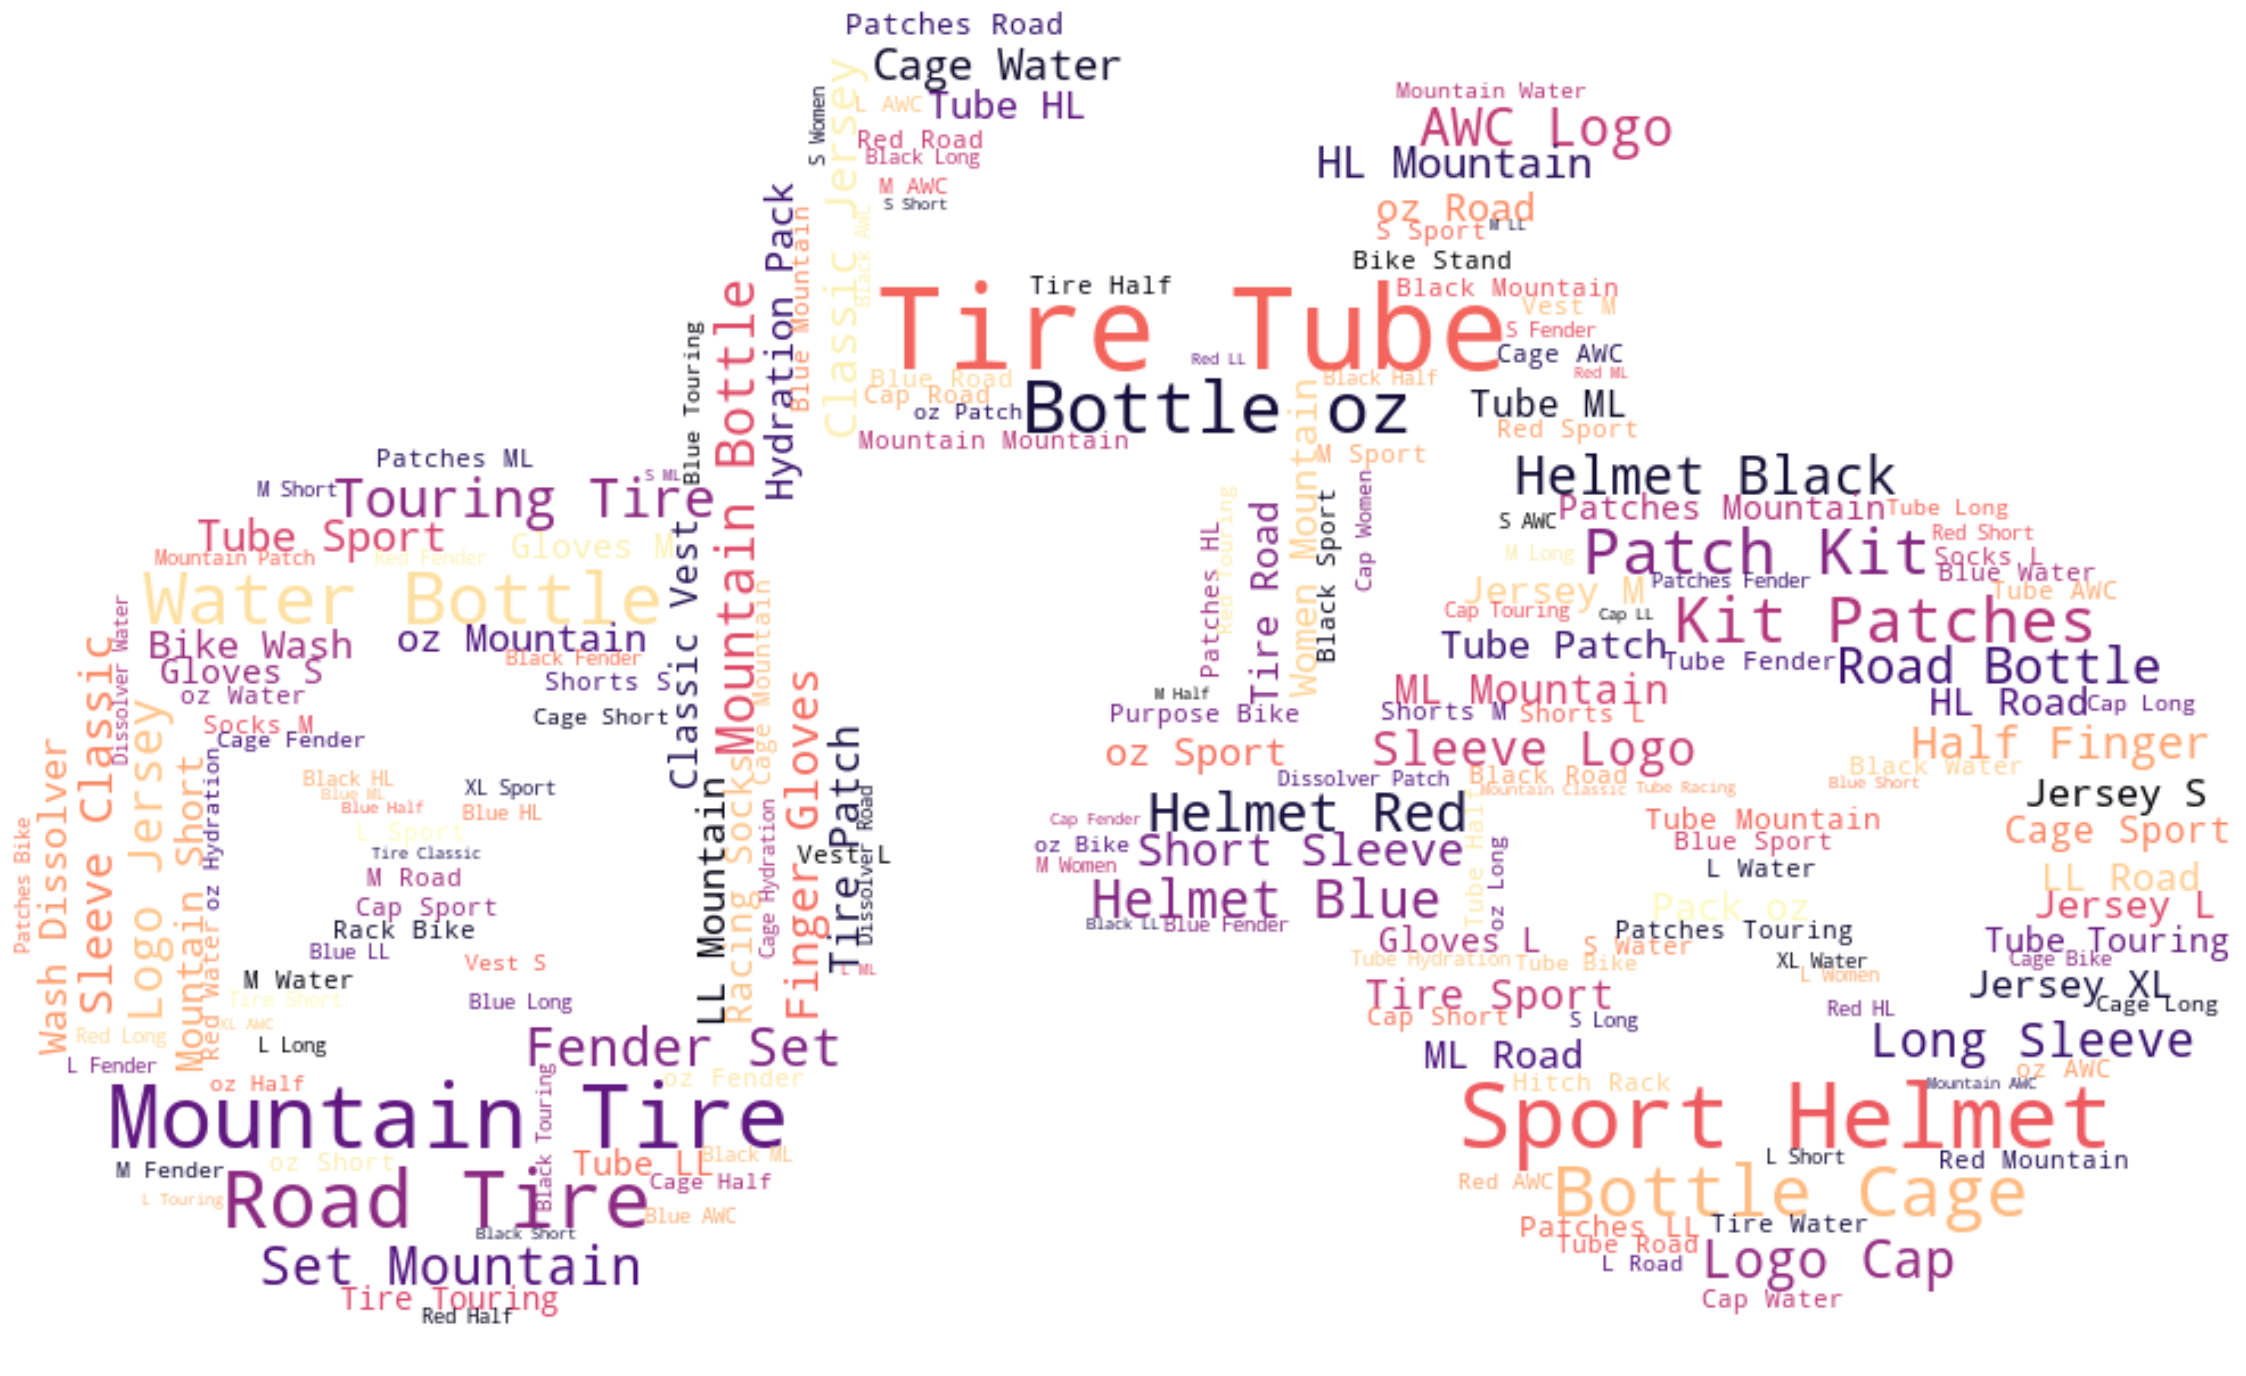

In [49]:
# create a word cloud
plt.subplots(figsize=(40, 40))

# removing stopwords
stopwords = set(STOPWORDS)

# import the mask as array
bike_mask = np.array(Image.open('bike_b.jpg'))

wordcloud = WordCloud(stopwords=stopwords,
                      collocations=True, 
                      width=1200,
                      height=800,
                      margin=0,
                      contour_width=0,
                      background_color="white",
                      colormap='magma',
                      mask=bike_mask).generate(names_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('bike_word_cloud.png')
plt.show()